In [1]:
# Loading of all necessary imports
# Using Seaborn instead of matplotlib for most plots as it has more powerful plots out of the box
import pandas as pd
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns
import numpy as np
from matplotlib import colors
from datetime import datetime 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from statsmodels.regression.mixed_linear_model import MixedLMParams

In [2]:
# Local source of data
data_path = "../data/"
sns.set_theme()

In [4]:
participant_path = join(data_path, "processed", "participant_data.csv.gz")
df_participants = pd.read_csv(participant_path, compression='gzip')
df_participants.set_index("participant_id", inplace=True)


daily_path = join(data_path, 'processed', 'daily_data.csv.gz')
df_daily = pd.read_csv(daily_path, compression='gzip')

df_daily['Wear Time'] = df_daily['Cardio_minutes'] + df_daily['Fat Burn_minutes'] + df_daily['Out of Range_minutes'] + df_daily['Peak_minutes']
df_daily = df_daily[df_daily['Wear Time'] > 960]
full_frame = df_daily.merge(df_daily, on='participant_id', how='inner', suffixes=('_yesterday', '_today'))
full_frame = full_frame[(pd.to_datetime(full_frame['Timestamp_yesterday']) - pd.to_datetime(full_frame['Timestamp_today'])) == pd.Timedelta('-1 day')]
df_desc = full_frame.merge(df_participants, on='participant_id', how='inner', suffixes=(None, '_meta'))
df = df_desc[['participant_id', 'RestingHeartRate_today', 'NumberSteps_yesterday', 'age', 'shift', 'gender']].dropna()
df['age'] = df['age'] /5 -5
df['age'] = df['age'].apply(lambda x: 0 if x < 0 else x)

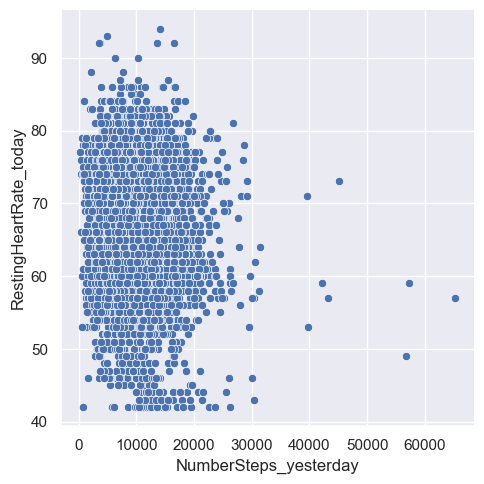

In [5]:
sns.relplot(x=df['NumberSteps_yesterday'], y=df['RestingHeartRate_today'])

In [7]:
df

,participant_id,RestingHeartRate_today,NumberSteps_yesterday,age,shift,gender
0,02581754-36cd-4b23-85ea-bf995c6dec83,59.0,18945,0.0,2.0,1
1,02581754-36cd-4b23-85ea-bf995c6dec83,62.0,19362,0.0,2.0,1
2,02581754-36cd-4b23-85ea-bf995c6dec83,62.0,16864,0.0,2.0,1
3,02581754-36cd-4b23-85ea-bf995c6dec83,59.0,12488,0.0,2.0,1
4,02581754-36cd-4b23-85ea-bf995c6dec83,61.0,26315,0.0,2.0,1
...,...,...,...,...,...,...
7771,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,77.0,4983,5.0,1.0,2
7772,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,79.0,11910,5.0,1.0,2
7773,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,80.0,9136,5.0,1.0,2
7774,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,80.0,7249,5.0,1.0,2


In [8]:
model = smf.mixedlm('RestingHeartRate_today ~ NumberSteps_yesterday + age + C(gender) + C(shift)', groups=df['participant_id'], data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
====================================================================
Model:            MixedLM Dependent Variable: RestingHeartRate_today
No. Observations: 7552    Method:             REML                  
No. Groups:       184     Scale:              6.6190                
Min. group size:  1       Log-Likelihood:     -18364.7471           
Max. group size:  70      Converged:          Yes                   
Mean group size:  41.0                                              
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                 64.304    1.357 47.401 0.000 61.645 66.963
C(gender)[T.2]             1.404    1.198  1.172 0.241 -0.944  3.752
C(shift)[T.2.0]            0.213    1.146  0.186 0.853 -2.034  2.460
NumberSteps_yesterday      0.000    0.000  6.496 0.000  0.000  0.000
age                        0.342    0.324  1.057 0.291 -0.292  0.976
Group Var                 54.216    2.268                           
====================================================================

"""

In [9]:
for table in result.summary().tables:
    print(table.to_latex())

\begin{tabular}{lllll}
\toprule
{} &                  0 &        1 &                    2 &                       3 \\
\midrule
0 &             Model: &  MixedLM &  Dependent Variable: &  RestingHeartRate\_today \\
1 &  No. Observations: &     7552 &              Method: &                    REML \\
2 &        No. Groups: &      184 &               Scale: &                  6.6190 \\
3 &   Min. group size: &        1 &      Log-Likelihood: &             -18364.7471 \\
4 &   Max. group size: &       70 &           Converged: &                     Yes \\
5 &   Mean group size: &     41.0 &                      &                         \\
\bottomrule
\end{tabular}

\begin{tabular}{lllllll}
\toprule
{} &   Coef. & Std.Err. &       z &  P>|z| &  [0.025 &  0.975] \\
\midrule
Intercept             &  64.304 &    1.357 &  47.401 &  0.000 &  61.645 &  66.963 \\
C(gender)[T.2]        &   1.404 &    1.198 &   1.172 &  0.241 &  -0.944 &   3.752 \\
C(shift)[T.2.0]       &   0.213 &    1.146 &   0.

C:\Users\bgrem\AppData\Local\Temp\ipykernel_15664\3406381553.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


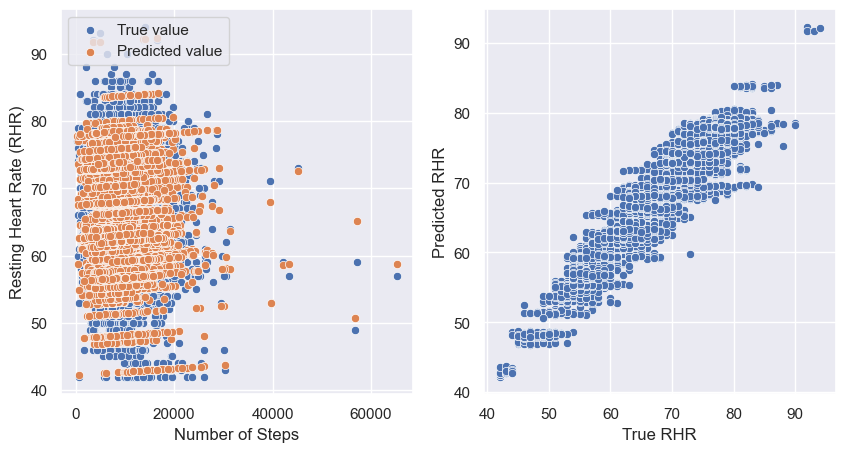

In [10]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
img = sns.scatterplot(ax=axes[0], x=df['NumberSteps_yesterday'], y=df['RestingHeartRate_today'])
img = sns.scatterplot(ax=axes[0], x=df['NumberSteps_yesterday'], y=result.fittedvalues)
img.set(xlabel='Number of Steps', ylabel='Resting Heart Rate (RHR)')
img.legend(loc='upper left', labels=['True value', 'Predicted value'])

img2 = sns.scatterplot(ax=axes[1], y=result.fittedvalues, x=df['RestingHeartRate_today'])
img2.set(xlabel='True RHR', ylabel='Predicted RHR')
fig.savefig('../stepsHeartRatePlot.jpg')